In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import matplotlib.gridspec as gridspec
import plotly.graph_objs as graphObj
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
videos = pd.read_csv('USvideos.csv',encoding='utf8',error_bad_lines = False);#opening the file USvideos

columns = ['video_id', 'title', 'channel_title', 'category_id',
          'tags', 'views', 'likes', 'dislikes', 'comment_total',
          'thumbnail_link', 'date']
us_vid_df =  pd.read_csv("USvideos.csv", usecols = columns)

comm = pd.read_csv('UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning:

Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
pol=[] # list which will contain the polarity of the comments
print(comm)
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

           video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1    

In [4]:
comm['pol']=pol

comm['pol'][comm.pol==0]= 0

comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

<ipython-input-4-4d6da047354a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-4d6da047354a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-4d6da047354a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
df_positive = comm[comm.pol==1]
df_positive.head()

,video_id,comment_text,likes,replies,pol
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,1.0
11,XpVt6Z1Gjjo,"Dear Logan, I really wanna get your Merch but ...",0,0,1.0
13,XpVt6Z1Gjjo,Casey is still better then logan,0,0,1.0
15,XpVt6Z1Gjjo,He happy cause he in a movie,0,0,1.0
18,XpVt6Z1Gjjo,It's been fun watching you grow. I'm at 42 day...,3,0,1.0


# Word Cloud for positive sentences

(-0.5, 999.5, 499.5, -0.5)

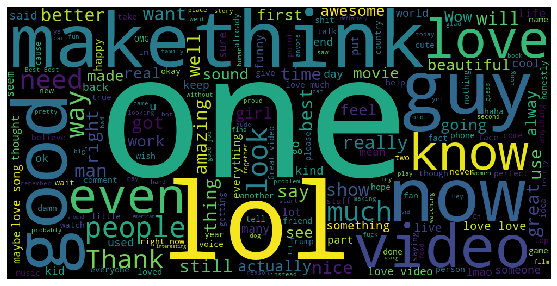

In [6]:
k= (' '.join(df_positive['comment_text']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Word Cloud for negative sentences


(-0.5, 999.5, 499.5, -0.5)

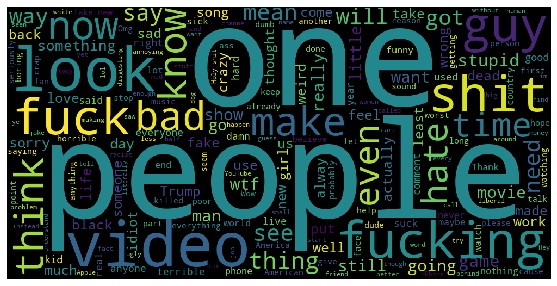

In [7]:
df_negative = comm[comm.pol==-1]
k= (' '.join(df_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Number of Type of Comments

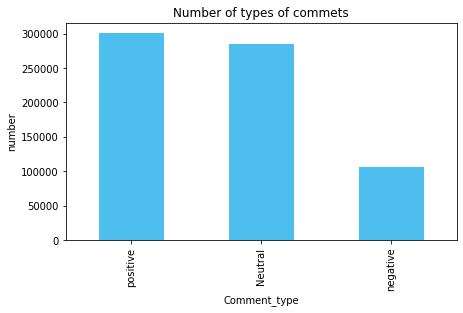

In [8]:
comm['pol'].replace({1:'positive',0:'Neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4), color=[0.3010, 0.7450, 0.9330]);
plt.title('Number of types of commets');
plt.xlabel('Comment_type');
plt.ylabel('number');

# unique_id and the info about its comment

In [9]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]
for i in set(comm.video_id):
    id.append(i)
    try:
        pos_comm.append(comm[comm.video_id==i].pol.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(comm[comm.video_id==i].pol.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neutral_comm.append(comm[comm.video_id==i].pol.value_counts()[0])
    except:
        neutral_comm.append(0)

In [10]:
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.head(6)

,id,pos_comm,neg_comm,neutral_comm,total_comments
0,3hq2c9vdfls,0,0,4,4
1,mTnRc4pVu4w,38,12,50,100
2,bAdqazixuRY,202,27,71,300
3,QtVL76gh09U,218,82,300,600
4,3WyD96Zq8Cw,2,0,2,4
5,tSwWCJHHTGc,50,19,31,100


In [11]:
df_unique.to_csv('unique.csv',index=False,)

In [12]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [13]:
comm.head()

,video_id,comment_text,likes,replies,pol
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [14]:
videos.date.value_counts()

12.10    200
4.10     200
20.10    200
5.10     200
18.10    200
15.10    200
16.10    200
29.09    200
1.10     200
14.10    200
11.10    200
23.09    200
15.09    200
2.10     200
21.09    200
14.09    200
13.10    200
17.09    200
21.10    200
3.10     200
22.10    200
16.09    200
19.10    200
10.10    200
17.10    200
7.10     200
30.09    200
28.09    200
13.09    200
22.09    200
8.10     200
20.09    200
19.09    200
6.10     200
18.09    200
25.09    199
24.09    199
27.09    199
26.09    199
9.10     196
Name: date, dtype: int64

In [15]:
print(videos.video_id.value_counts()[:12]) # these videos have become 7 times the most trending videos of these 2 weeks.
most_trending = videos.video_id.value_counts()[:12].index

Oo0NJsr5m4I    8
LunHybOKIjU    8
Hlt3rA-oDao    8
odhMmAPDc54    7
rgbnZG85IRo    7
5Xe0Qd6bUFo    7
CYoRmfI0LUc    7
OlI8r3nNUVw    7
5ggZ9jIHnr8    7
ZczwzVhai9E    7
3QWQ4gN3j4E    7
iALfvFpcItE    7
Name: video_id, dtype: int64


In [16]:
videos[videos.video_id=='mlxdnyfkWKQ']

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1647,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93109,1642,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09
1650,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93153,1644,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09
1855,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],115720,1747,89,313,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,22.09
2129,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],135303,1781,92,252,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,23.09
2337,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],141666,1790,94,254,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,24.09
2561,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,scary|funny|russia|prikol|car|traffic|sidecar|...,161606,1823,97,257,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,25.09
2790,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,scary|funny|russia|prikol|car|traffic|sidecar|...,201549,1944,101,260,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,26.09


# Tags 

(-0.5, 999.5, 499.5, -0.5)

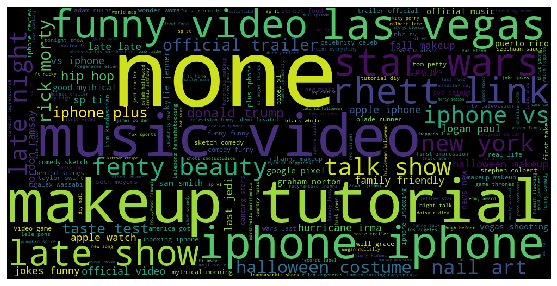

In [17]:
# slpitting the tags
tags = videos['tags'].map(lambda k: k.lower().split('|')).values 

# joining and making a complete list
k= (' '.join(videos['tags']))  
wordcloud = WordCloud(width = 1000, height = 500).generate((' '.join(k.lower().split('|'))))# word cloud


plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [18]:
unique = pd.read_csv('unique.csv',)

In [19]:
unique.sort_values(by='pos_comm',ascending=False).head(5)

,id,pos_comm,neg_comm,neutral_comm,total_comments
1863,eERPlIdPJtI,426,32,142,600
494,Zmi9iQp6944,411,55,34,500
463,udnGW3E1vxY,404,51,242,697
184,xTyTQgb-y-A,401,40,127,568
1212,zKriLekFPwg,399,46,255,700


# 'Weight Update: 6 weeks Post Surgery! 93 pounds!' have very large number of positive reviews

In [20]:
videos[videos.video_id == 'eERPlIdPJtI'].title[225]

'Weight Update: 6 weeks Post Surgery! 93 pounds!'

# Mean of Positive Comments

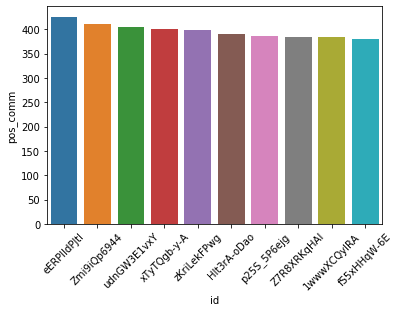

<Figure size 360x288 with 0 Axes>

In [21]:
sns.barplot(data=unique.sort_values(by='pos_comm',ascending=False).head(10),x='id',y='pos_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

# Mean of Negative Comments

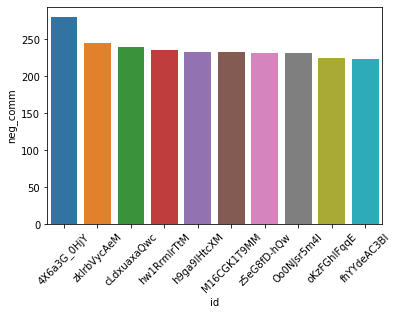

<Figure size 360x288 with 0 Axes>

In [22]:
sns.barplot(data=unique.sort_values(by='neg_comm',ascending=False).head(10),x='id',y='neg_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

# Total Comments

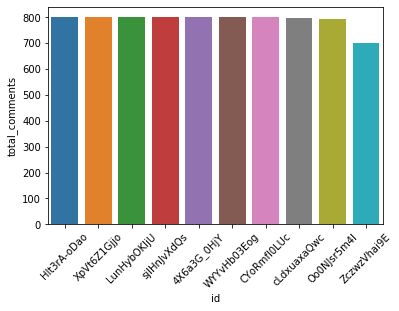

<Figure size 360x288 with 0 Axes>

In [23]:
sns.barplot(data=unique.sort_values(by='total_comments',ascending=False).head(10),x='id',y='total_comments')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

# Regression plot for Likes and Views

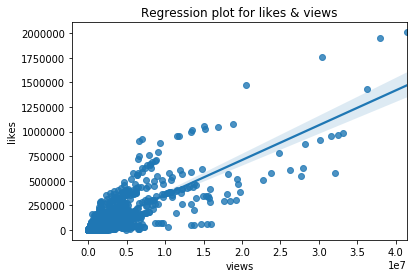

In [24]:
sns.regplot(data=videos,x='views',y='likes');
plt.title("Regression plot for likes & views");

# Regression plot for Dislikes and Views

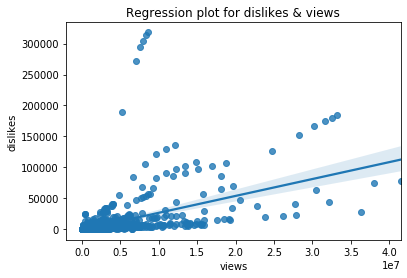

In [25]:
sns.regplot(data=videos,x='views',y='dislikes');
plt.title("Regression plot for dislikes & views");

# Correlation matrix is the evidence of above analysis!

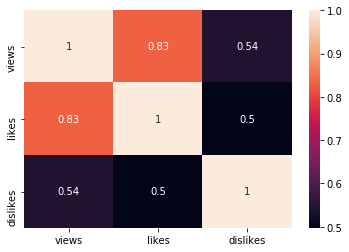

In [26]:
df_corr = videos[['views','likes','dislikes']]

sns.heatmap(df_corr.corr(),annot=True)

# Correlation between Views, Likes, Dislikes and Comments

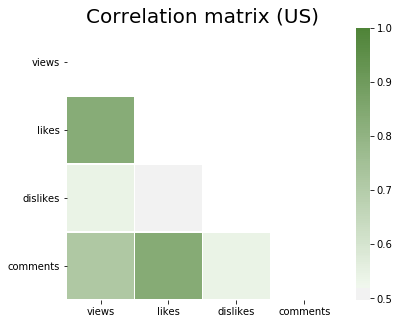

In [27]:
us_vid_df.rename(columns={'comment_total':'comments'}, inplace=True)
corr_us = us_vid_df.loc[:,['views', 'likes', 'dislikes', 'comments']].corr()

mask = np.zeros_like(corr_us, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])
cmap = sns.diverging_palette(196, 120, as_cmap=True)


ax2 = plt.subplot(gs[0,1])
ax1 = sns.heatmap(corr_us, cmap=cmap, vmax=1, center=0.5,
                  square=True, linewidths=.5, mask=mask)
ax2.set_title('Correlation matrix (US)', fontsize=20)
plt.yticks(rotation=0)

plt.show()

# Plotting Views, Comments, Likes and Dislikes for whole period of database

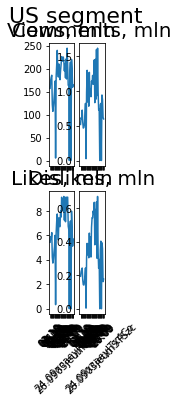

In [32]:
df = us_vid_df[['date','views', 'likes',
             'dislikes','comments']].groupby('date', as_index = False).sum()
df[['views','likes', 'dislikes','comments']] = df[['views', 'likes',
                                                   'dislikes', 'comments']].apply(lambda x: x/1000000)
fig = plt.figure(figsize=(1, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1])

ax1 = plt.subplot(gs[0,0])
ax1.plot(df['date'], df['views'])
ax1.set_xticklabels("")
ax1.set_title('Views, mln', fontsize=20)

ax2 = plt.subplot(gs[0,1])
ax2.plot(df['date'], df['comments'])
ax2.set_xticklabels("")
ax2.set_title('Comments, mln', fontsize=20)

ax3 = plt.subplot(gs[1,0])
ax3.plot(df['date'], df['likes'])
ax3.set_xticks(df['date'].values)
ax3.set_xticklabels(df['date'], rotation=45)
ax3.set_title('Likes, mln', fontsize=20)

ax4 = plt.subplot(gs[1,1])
ax4.plot(df['date'], df['dislikes'])
ax4.set_xticks(df['date'].values)
ax4.set_xticklabels(df['date'], rotation=45)
ax4.set_title('Dislikes, mln', fontsize=20)

plt.suptitle('{} segment'.format('US'), fontsize=22)

plt.show()

# Analysis on Emojis in comments

In [33]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
comm['emoji'] = comm['comment_text'].apply(lambda x: re.findall(emoji_pattern, str(x)))

comm['emoji'] = comm['emoji'].apply(lambda x: [i for sublist in x for i in sublist])

emo_list = comm['emoji'].values.tolist()
emo_list_flatten = [i for sublist in emo_list for i in sublist]

# only unique values from the list
emo_unique = list(set(emo_list_flatten))
emo_all = " ".join(emo_list_flatten)

In [34]:
emo_dict = {}
for i in emo_unique:
    emo_dict[i] = len(re.findall(i, emo_all))

In [36]:
emo_df = pd.DataFrame.from_dict(emo_dict, orient = 'index')
emo_df = emo_df.reset_index()
emo_df.columns = ["emoji", 'frequency']
emo_df.sort_values('frequency', ascending = False, inplace = True)
emo_df_top15 = emo_df.head(15).copy()
emo_df_top15.sort_values('frequency', ascending = False, inplace = True)

# plot
data = [graphObj.Bar(x = emo_df_top15['emoji'],
               y = emo_df_top15['frequency'],
               orientation = 'v',
               marker = dict(color = 'rgba(110, 160, 1, 0.7)',
                             line = dict(color = 'rgba(110, 160, 1, 0.7)',
                                         width = 1)))]

layout = dict(title = 'Top 15 most frequent emojis')
fig = dict(data = data, layout = layout)
iplot(fig, filename='basic-bar')

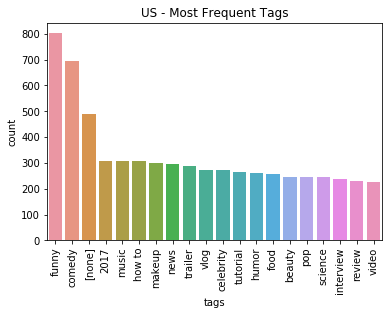

In [37]:
def form_hist(given_list,top_n):
    """
    Returns a sorted histogram dataframe (with top_n rows) for a given list.
    """
    item_set = set(given_list)
    items = []
    counts = []
    for nm in item_set:
        items.append(nm)
        counts.append(given_list.count(nm))
    return pd.DataFrame({'count':counts,'items':items}).sort_values(by='count',ascending=False).head(top_n)

def create_hist(videos, num, title):
    """
    Plots our histogram
    """
    all_tags = videos['tags'].map(lambda k: k.lower().split('|')).values
    all_tags = [item for sublist in all_tags for item in sublist]

    counts = form_hist(all_tags,num)
    counts.columns = ['count','tags']
    plt.figure()
    sns.barplot(x = counts['tags'], y = counts['count'])
    plt.xticks(rotation=90)
    plt.ylabel('count')
    plt.title(title)

create_hist(videos,20,'US - Most Frequent Tags')